# Justin Hartanto Widjaja 27022222610 Model Deployment

Anda adalah seorang data scientist dari suatu Perusahaan dan diminta untuk membuat dan meng deploy
model machine learning dalam melakukan klasifikasi berdasarkan case sesuai dengan dataset yang Anda
dapatkan dari ketentuan sebelumnya. Lakukan langkah-langkah berikut untuk menyelsaikan tugas Anda:
1. Buatlah model machine learning yang berisi proses pre-processing machine learning, training, dan hasil dari perbadingan 2 algoritma machine learning yaitu Random Forest dan Xgboost. Ambil algoritma terbaik dan simpan dengan menggunakan pickle. Seluruh proses disimpan dengan extension .ipynb

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, roc_curve, auc
from xgboost import XGBClassifier

## Reading and Understanding the Data

In [ ]:
df = pd.read_csv('Dataset_B_hotel.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
row_df, column_df = df.shape
print(f'There are {row_df} rows and {column_df} columns in the dataset.')

There are 36275 rows and 19 columns in the dataset.


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

There are 19 columns in the dataset, and up to 36275 rows.

### Looking at the datatypes

In [ ]:
cat_col = []
num_col = []

for i in df.columns:
    if df[i].dtype == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)

print(f'The categorical columns are: {cat_col}')
print(f'The numerical columns are: {num_col}')

The categorical columns are: ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
The numerical columns are: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


### Finding unique identifier

In [ ]:
df.nunique()

,0
Booking_ID,36275
no_of_adults,5
no_of_children,6
no_of_weekend_nights,8
no_of_week_nights,18
type_of_meal_plan,4
required_car_parking_space,2
room_type_reserved,7
lead_time,352
arrival_year,2


Here, the unique identifier is *'Booking_ID'*, so I will drop it.

In [ ]:
df_cleaned = df.drop(['Booking_ID'], axis = 1)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     35368 non-null  object 
 5   required_car_parking_space            35005 non-null  float64
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

### Checking Duplicated and Missing Values

In [ ]:
df_cleaned.duplicated().sum()

np.int64(9197)

There are 9197 duplicated values inside the dataset, so we must drop them.

In [ ]:
df_cleaned = df_cleaned.drop_duplicates()

In [ ]:
df_cleaned.duplicated().sum()

np.int64(0)

Now, there are no more duplicates in the dataset.

In [ ]:
df_cleaned.isnull().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,880
required_car_parking_space,1190
room_type_reserved,0
lead_time,0
arrival_year,0
arrival_month,0


We see there are 880 missing values in *'type_of_meal_plan'*, 1190 missing values in *'required_car_parking_space'*, and 1517 missing values in *'avg_price_per_room'*. Now, let's see what we will do with the missing values.

### Determining what to do with the missing values

In [ ]:
missing_values = df.isnull().mean()*100
data_type = df.dtypes
unique_values_count = df.nunique()
null_count = df.isnull().sum()

summary_1 = pd.DataFrame({
    'Null Count': null_count,
    'Null Percentage': missing_values,
    'Datatype': data_type,
    'Unique value': unique_values_count
})

summary_1.sort_values(by = 'Null Percentage', ascending= False)

,Null Count,Null Percentage,Datatype,Unique value
avg_price_per_room,1632,4.498966,float64,3850
required_car_parking_space,1270,3.501034,float64,2
type_of_meal_plan,907,2.500345,object,4
no_of_children,0,0.000000,int64,6
no_of_adults,0,0.000000,int64,5
Booking_ID,0,0.000000,object,36275
no_of_week_nights,0,0.000000,int64,18
room_type_reserved,0,0.000000,object,7
lead_time,0,0.000000,int64,352
arrival_year,0,0.000000,int64,2


Because all of the columns' missing value percentage is not up to 5%, I will impute those columns with the median for the numerical columns and the mode for the categorical columns.

In [ ]:
df['avg_price_per_room'] = df['avg_price_per_room'].fillna(df['avg_price_per_room'].median())
df['required_car_parking_space'] = df['required_car_parking_space'].fillna(df['required_car_parking_space'].median())
df['type_of_meal_plan'] = df['type_of_meal_plan'].fillna(df['type_of_meal_plan'].mode()[0])

Let's check.

In [ ]:
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


### Univariate Analysis

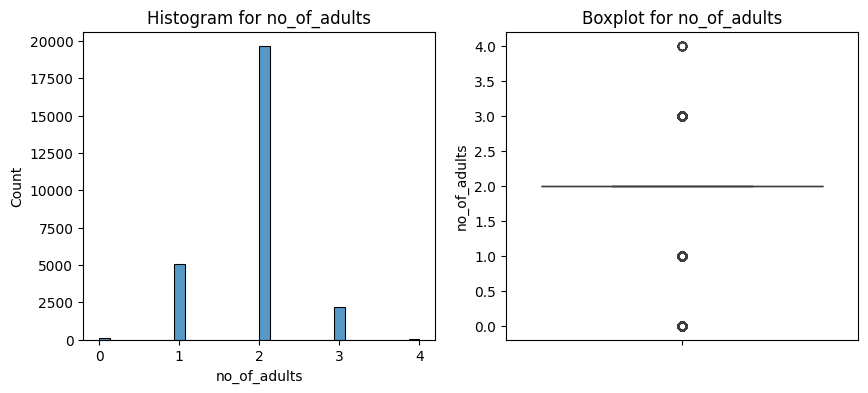

Skewness: -0.30078424028338513
Kurtosis: 1.0837444974491062


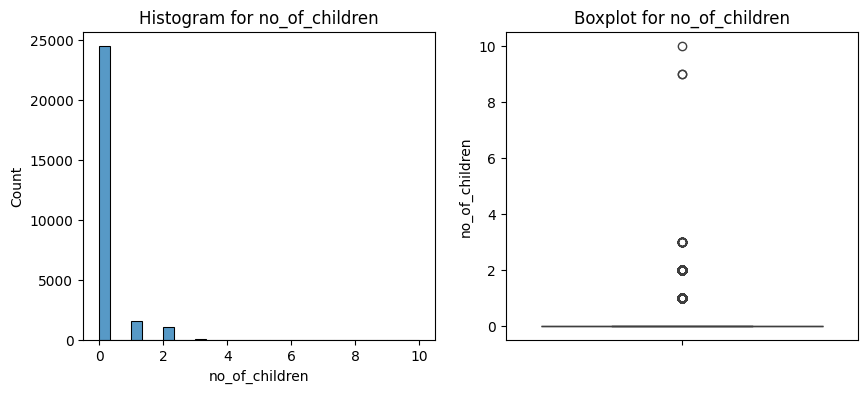

Skewness: 4.082416792180457
Kurtosis: 28.350950298043223


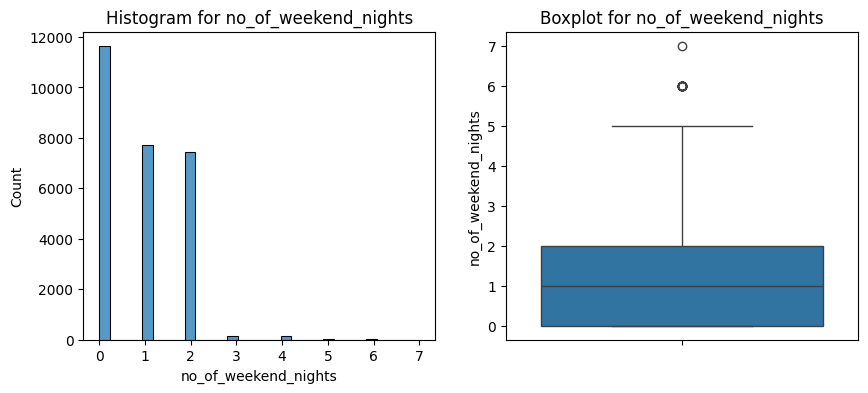

Skewness: 0.6619146171538379
Kurtosis: 0.33379228679535533


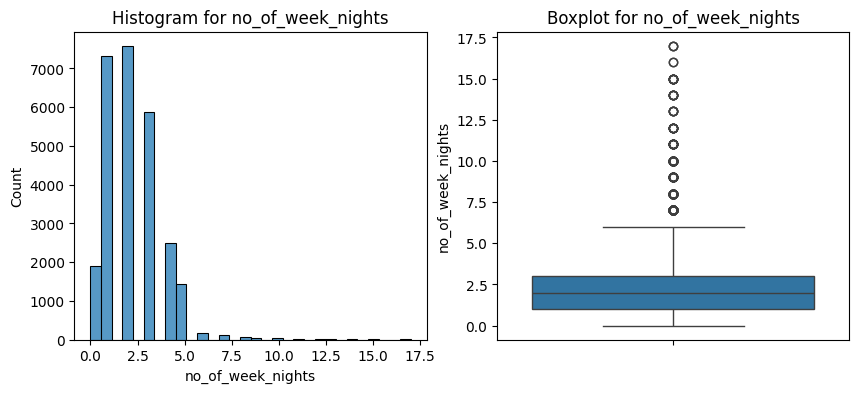

Skewness: 1.5956165528784012
Kurtosis: 7.2744014608473595


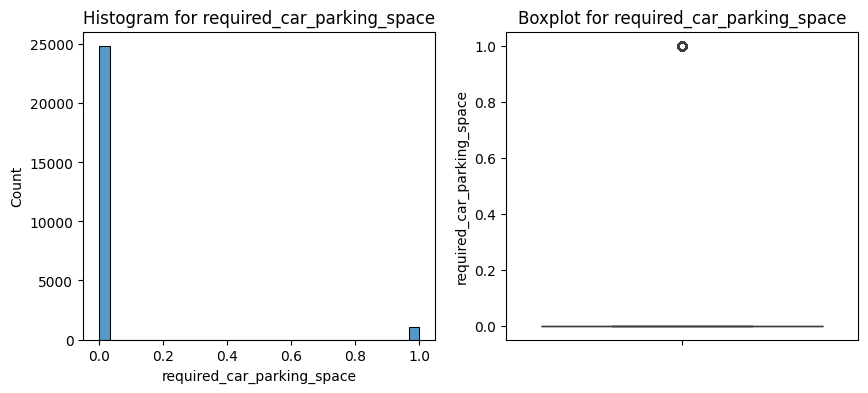

Skewness: 4.601352075681858
Kurtosis: 19.173922216487334


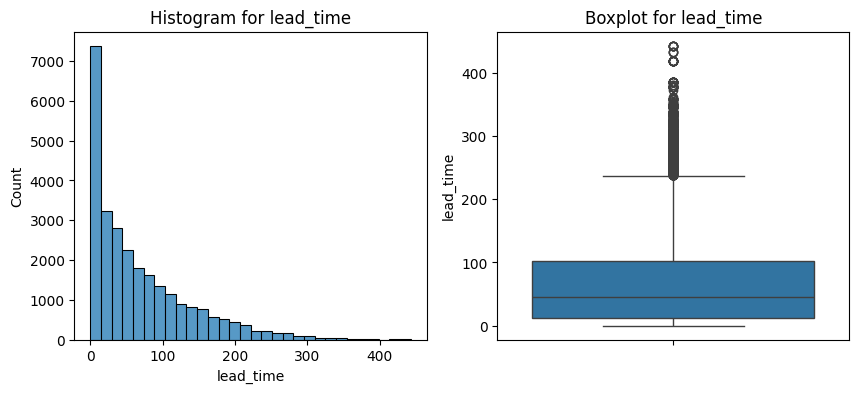

Skewness: 1.4289101443554122
Kurtosis: 1.9769137620753234


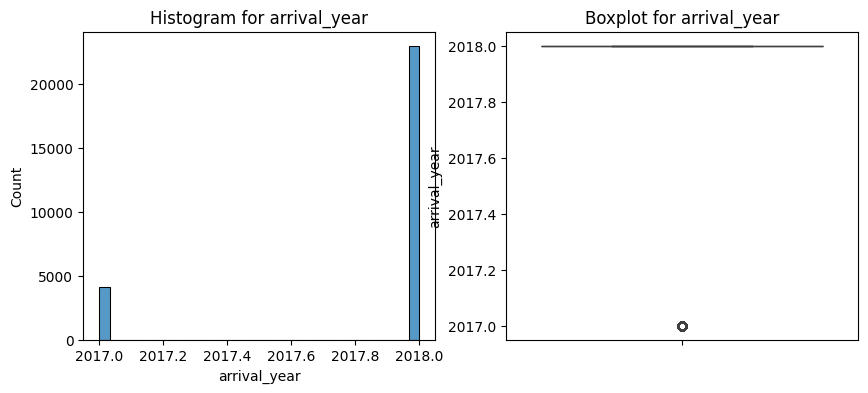

Skewness: -1.9255525365945745
Kurtosis: 1.7078787108457085


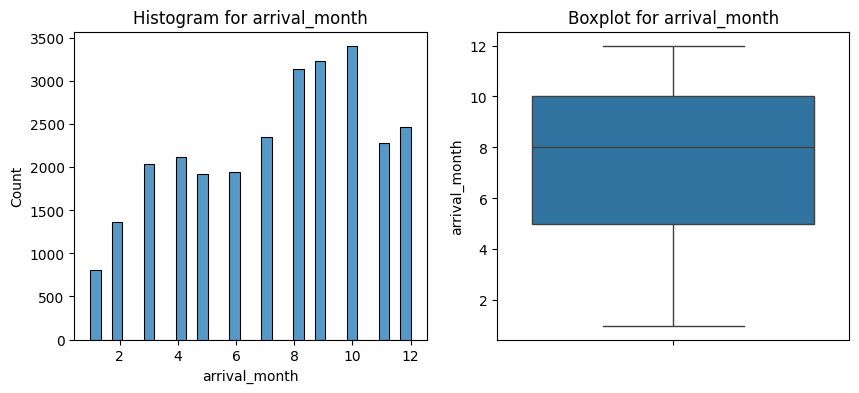

Skewness: -0.2992020732109068
Kurtosis: -1.0001741914376985


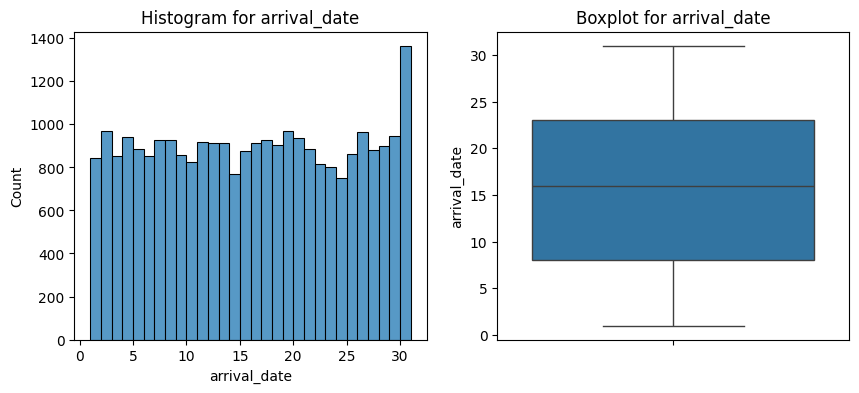

Skewness: 0.013004263640443818
Kurtosis: -1.1990572503917858


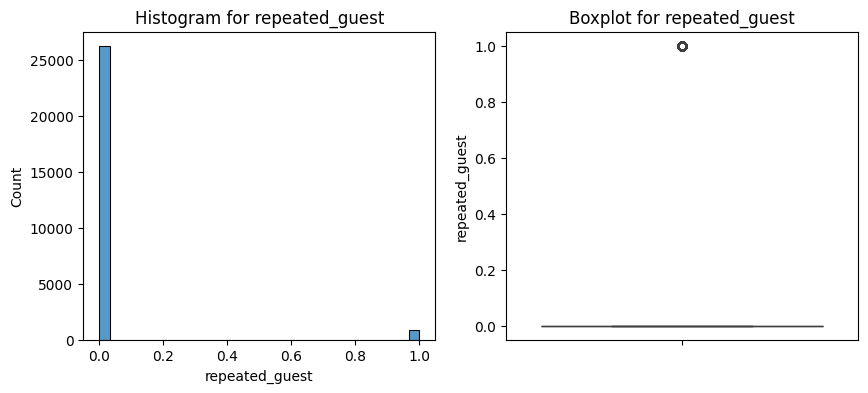

Skewness: 5.337178518171583
Kurtosis: 26.4874309095363


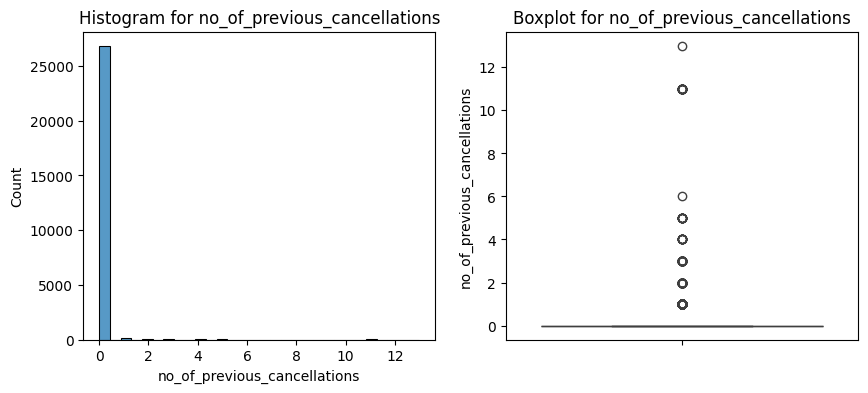

Skewness: 22.35612034006286
Kurtosis: 576.5209405089287


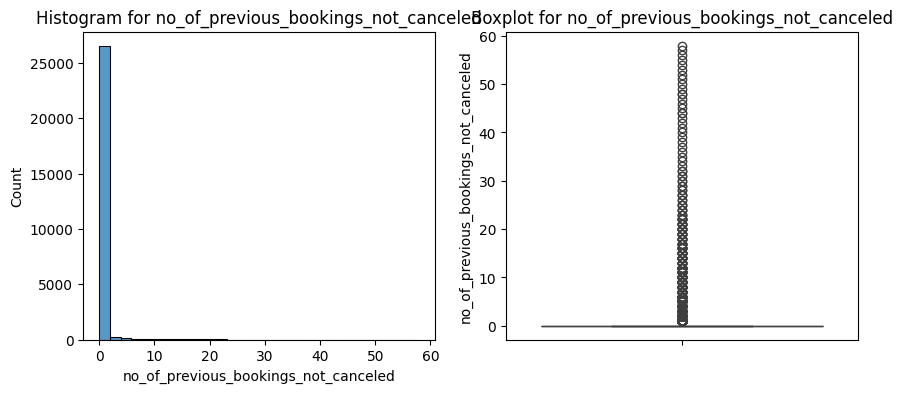

Skewness: 16.62620955358643
Kurtosis: 340.9270572792144


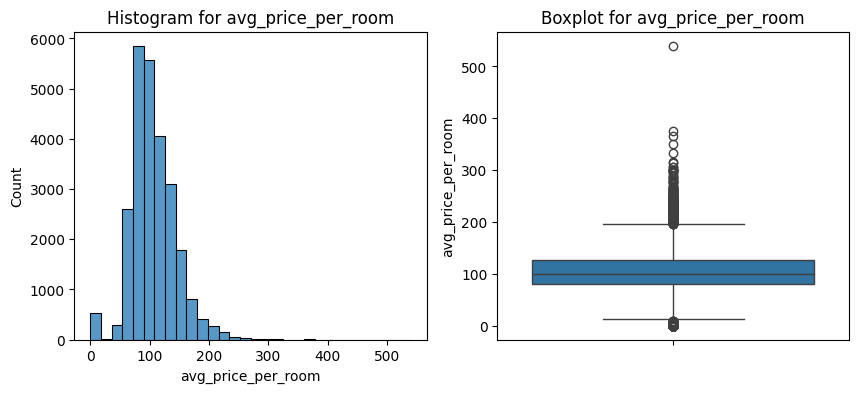

Skewness: 0.5967073286879541
Kurtosis: 2.684714474391097


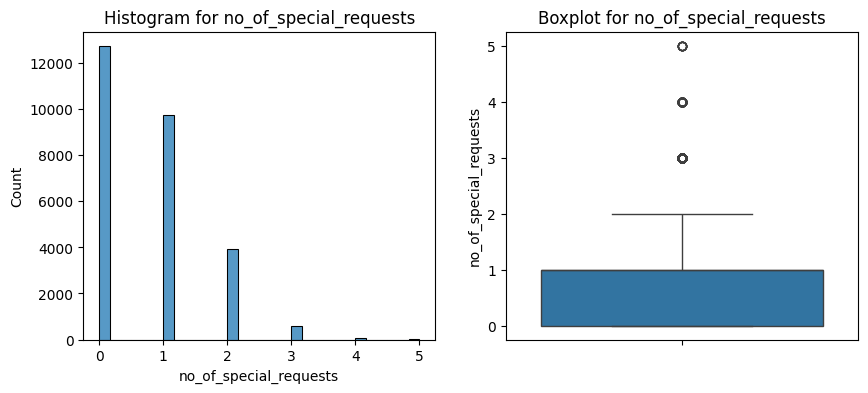

Skewness: 0.9314805347497359
Kurtosis: 0.45142301630509607


In [ ]:
num_df = df_cleaned.select_dtypes(include=[np.number])
def check_distribution_outliers(df, columns):
    for i in columns:
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        sns.histplot(df[i], bins=30)
        plt.title(f'Histogram for {i}')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[i])
        plt.title(f'Boxplot for {i}')

        plt.show()

        print('Skewness:', df[i].skew())
        print('Kurtosis:', df[i].kurt())

check_distribution_outliers(df_cleaned, num_df.columns)

We see that most of these columns are not normally distributed, indicated by the larger than usual skewness and kurtosis scores.

### Determining what scale to use

In [ ]:
for i in num_df:
  print(f'{i}: {shapiro(num_df[i])}, \n')

no_of_adults: ShapiroResult(statistic=np.float64(0.701252545743877), pvalue=np.float64(1.561364669386554e-110)), 

no_of_children: ShapiroResult(statistic=np.float64(0.3270033996892998), pvalue=np.float64(3.209834623374259e-133)), 

no_of_weekend_nights: ShapiroResult(statistic=np.float64(0.7922277075940685), pvalue=np.float64(4.3954267649038345e-101)), 

no_of_week_nights: ShapiroResult(statistic=np.float64(0.8721628047117829), pvalue=np.float64(4.06875354629128e-89)), 

required_car_parking_space: ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan)), 

lead_time: ShapiroResult(statistic=np.float64(0.8487462949322924), pvalue=np.float64(3.5662827290307087e-93)), 

arrival_year: ShapiroResult(statistic=np.float64(0.4310043392011531), pvalue=np.float64(2.355112176808979e-128)), 

arrival_month: ShapiroResult(statistic=np.float64(0.9463727218738159), pvalue=np.float64(1.2520977087185396e-69)), 

arrival_date: ShapiroResult(statistic=np.float64(0.9529468608896011), pvalue=np.f

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27078.
  res = hypotest_fun_out(*samples, **kwds)


Because all of the p-values are all less than 0.05, the scaler to use later on will be RobustScaler, as it handles outliers well.

### Multivariate Analysis

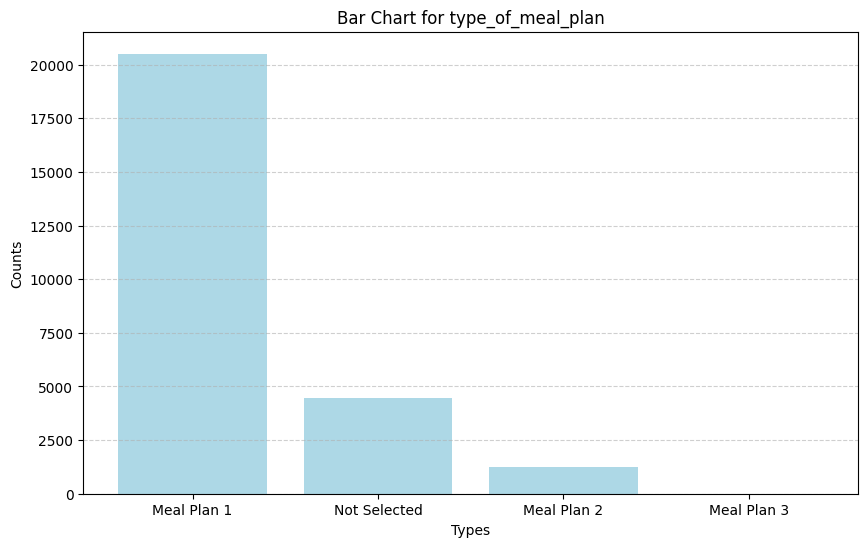

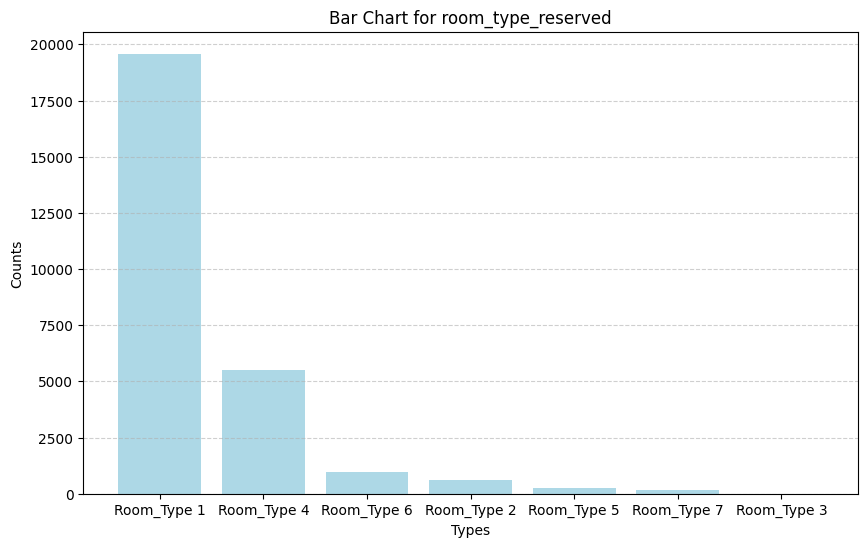

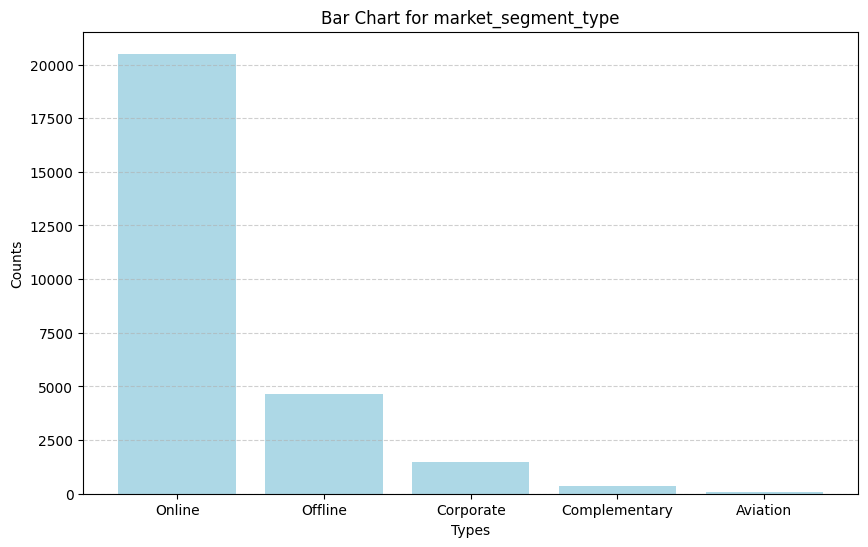

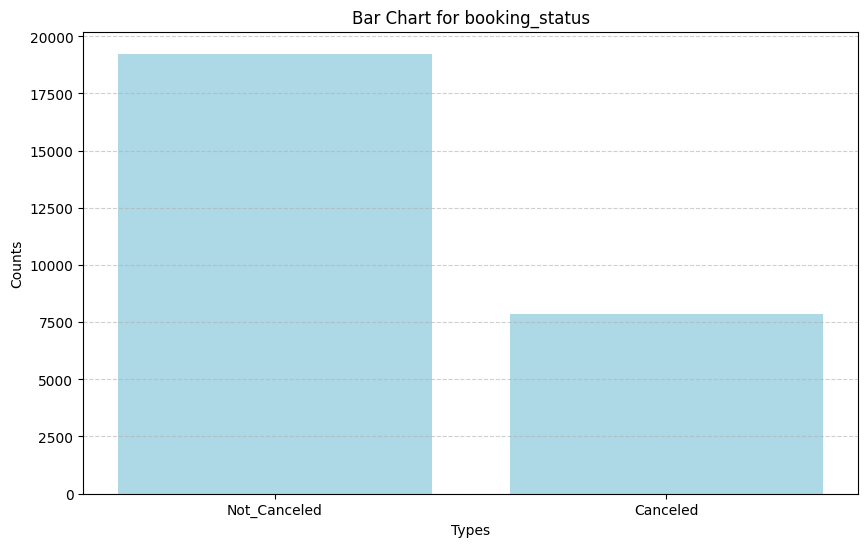

In [ ]:
cat_col = df_cleaned.select_dtypes(include=['object'])
def check_distribution(df, columns):
  for i in columns:
    plt.figure(figsize=(10, 6))
    plt.bar(x = df_cleaned[i].value_counts().index, height = df_cleaned[i].value_counts().values, color= 'lightblue')
    plt.title(f"Bar Chart for {i}")
    plt.xlabel("Types")
    plt.ylabel("Counts")
    plt.grid(axis = "y", alpha = 0.6, linestyle = "--")
    plt.show()

check_distribution(df_cleaned, cat_col.columns)

So, by looking at these bar graphs, we can see that a lot of these columns are imbalanced, so we may need to do oversampling or undersampling so that the model is not biased.

### Correlation

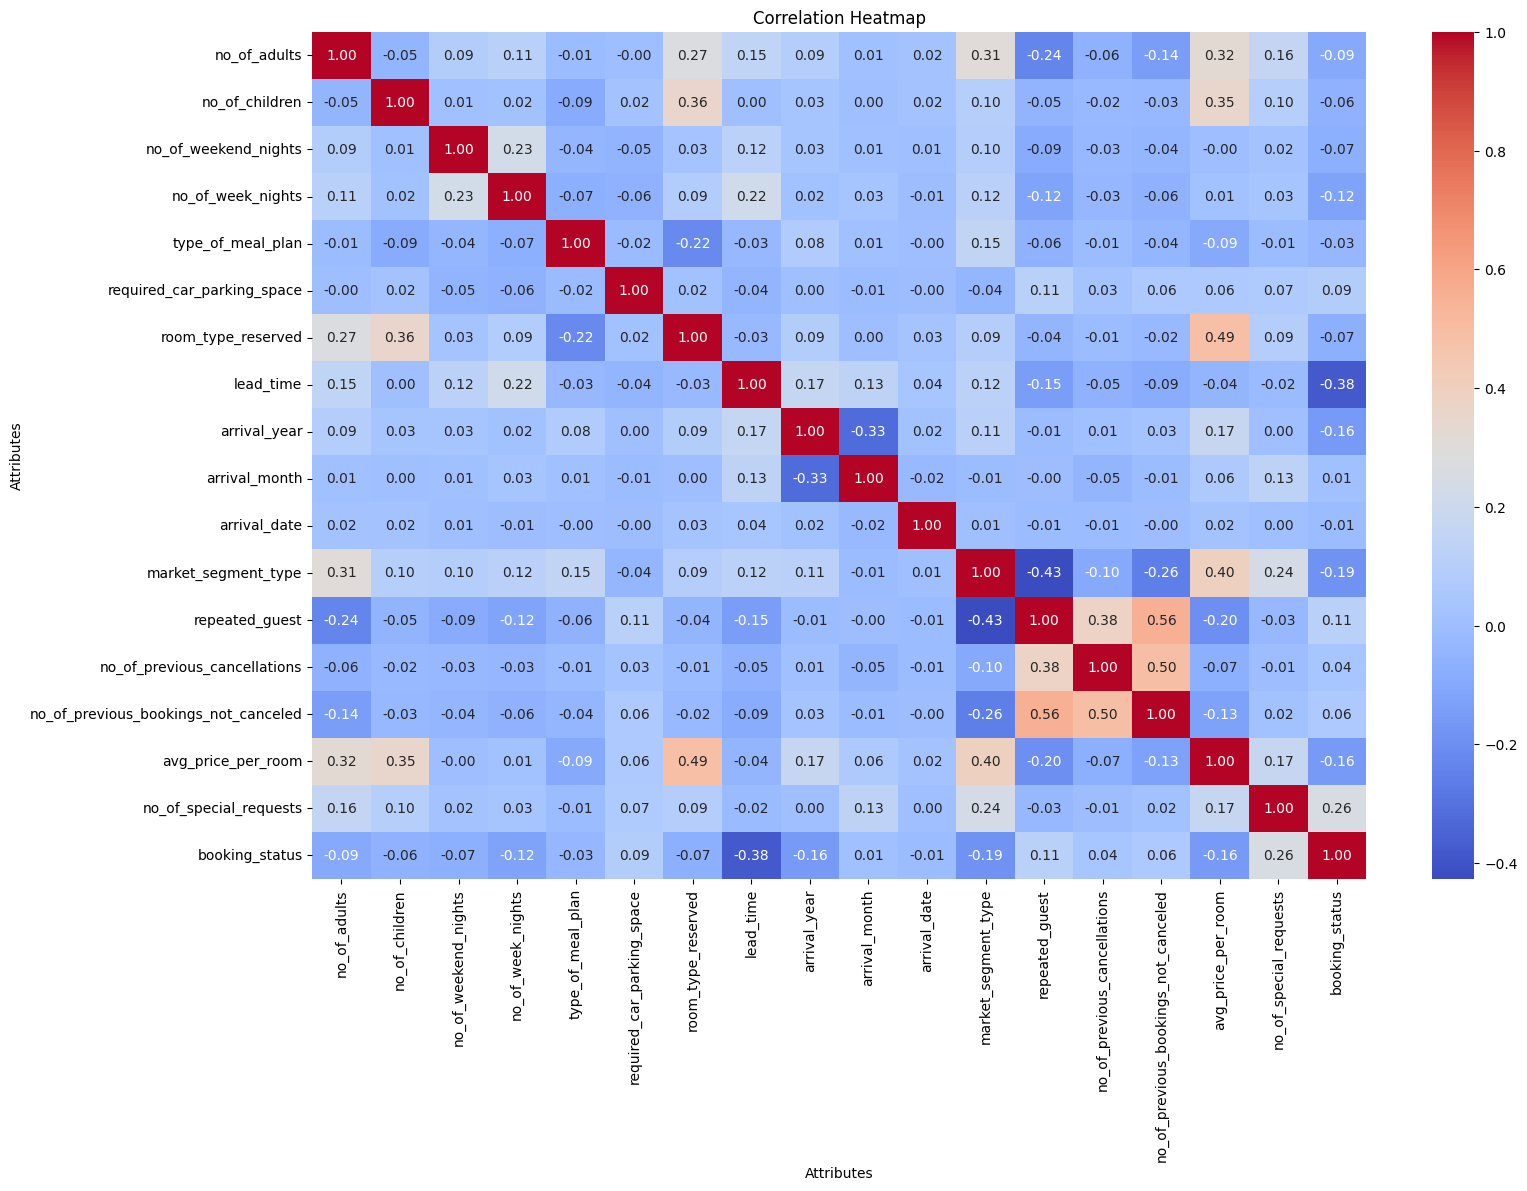

In [ ]:
encoded_data = df_cleaned.copy()

def encode_categorical_columns(df):
    label_encoder = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))
    return df

encoded_data = encode_categorical_columns(encoded_data)

correlation_matrix = encoded_data.corr()

def plot_correlation_heatmap(corr_matrix, figsize=(17, 11), title="Correlation Heatmap"):
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
    plt.title(title)
    plt.xlabel("Attributes")
    plt.ylabel("Attributes")
    plt.show()

plot_correlation_heatmap(correlation_matrix)

From this correlation plot, I can see that the columns that have the highest correlation score are *'lead_time' (0.38)*, *'no_of_special_requests' (0.26)*, and *'market_segment_type' (0.19)*.

While the columns with the lowest correlation score are *'arrival_month' (0.01)*, *'arrival_date' (0.01)*, and *'type_of_meal_plan' (0.03)*.

But, based on the problems given, the models we needed to build are RandomForest and XGBoost, which are tree-based models, and these models can capture non-linear relationships, so we will not drop any columns.

### Finding Possible Anomalies

In [ ]:
for i in cat_col:
    print(df_cleaned[i].value_counts(),'\n')

type_of_meal_plan
Meal Plan 1     20513
Not Selected     4448
Meal Plan 2      1232
Meal Plan 3         5
Name: count, dtype: int64 

room_type_reserved
Room_Type 1    19583
Room_Type 4     5527
Room_Type 6      949
Room_Type 2      617
Room_Type 5      240
Room_Type 7      156
Room_Type 3        6
Name: count, dtype: int64 

market_segment_type
Online           20504
Offline           4636
Corporate         1477
Complementary      358
Aviation           103
Name: count, dtype: int64 

booking_status
Not_Canceled    19244
Canceled         7834
Name: count, dtype: int64 



Here, the anomalies were in the target variable, which is *'booking_status'*, it should be *Cancelled*, not Canceled. So, let's change that.

In [ ]:
df_cleaned['booking_status'] = df_cleaned['booking_status'].replace('Canceled', 'Cancelled')
df_cleaned['booking_status'] = df_cleaned['booking_status'].replace('Not_Canceled', 'Not_Cancelled')

Now, let's check.

In [ ]:
for i in cat_col:
    print(df_cleaned[i].value_counts(),'\n')

type_of_meal_plan
Meal Plan 1     20513
Not Selected     4448
Meal Plan 2      1232
Meal Plan 3         5
Name: count, dtype: int64 

room_type_reserved
Room_Type 1    19583
Room_Type 4     5527
Room_Type 6      949
Room_Type 2      617
Room_Type 5      240
Room_Type 7      156
Room_Type 3        6
Name: count, dtype: int64 

market_segment_type
Online           20504
Offline           4636
Corporate         1477
Complementary      358
Aviation           103
Name: count, dtype: int64 

booking_status
Not_Cancelled    19244
Cancelled         7834
Name: count, dtype: int64 



In [ ]:
for i in num_df:
    print(df_cleaned[i].describe(), '\n')

count    27078.000000
mean         1.884519
std          0.527484
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: no_of_adults, dtype: float64 

count    27078.000000
mean         0.136458
std          0.455048
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: no_of_children, dtype: float64 

count    27078.000000
mean         0.876209
std          0.885285
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: no_of_weekend_nights, dtype: float64 

count    27078.000000
mean         2.254561
std          1.501785
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         17.000000
Name: no_of_week_nights, dtype: float64 

count    25888.000000
mean         0.041448
std          0.199327
min          0.000000
25%          0.000000
50%          0.000000
7

So, from this dataset, there is only one anomaly detected, in the *'booking_status'* column.

## Data Preprocessing

### Encoding

In [ ]:
cate = []
nume = []

for i in df_cleaned.columns:
    if df_cleaned[i].dtype == 'object':
        cate.append(i)
    else:
        nume.append(i)

print(f'The categorical columns are: {cate}')
print(f'The numerical columns are: {nume}')

The categorical columns are: ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
The numerical columns are: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [ ]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], drop_first=False)
df_cleaned['booking_status'] = df_cleaned['booking_status'].map({
    'Not_Cancelled': 0,
    'Cancelled': 1
})

Here, I decided to use One-Hot Encoding for *'type_of_meal_plan'*, *'room_type_reserved'*, and *'market_segment_type'*. Now for *'booking_status'*, I use Label Encoding.

In [ ]:
df_cleaned.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0.0,224,2017,10,2,0,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0.0,5,2018,11,6,0,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0.0,1,2018,2,28,0,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0.0,211,2018,5,20,0,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0.0,48,2018,4,11,0,...,False,False,False,False,False,False,False,False,False,True


### Splitting Data

In [ ]:
x = df_cleaned.drop('booking_status', axis = 1)
y = df_cleaned['booking_status']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#### Determine whether to Undersample or Oversample or not

In [ ]:
for i in x:
  print(f'{i}.value_counts(): {x[i].value_counts()}')

no_of_adults.value_counts(): no_of_adults
2    19639
1     5087
3     2200
0      136
4       16
Name: count, dtype: int64
no_of_children.value_counts(): no_of_children
0     24481
1      1539
2      1037
3        18
9         2
10        1
Name: count, dtype: int64
no_of_weekend_nights.value_counts(): no_of_weekend_nights
0    11625
1     7723
2     7423
3      138
4      124
5       24
6       20
7        1
Name: count, dtype: int64
no_of_week_nights.value_counts(): no_of_week_nights
2     7570
1     7324
3     5877
4     2485
0     1895
5     1447
6      174
7      109
8       61
10      52
9       32
11      17
15       9
12       9
14       7
13       5
17       3
16       2
Name: count, dtype: int64
required_car_parking_space.value_counts(): required_car_parking_space
0.0    24815
1.0     1073
Name: count, dtype: int64
lead_time.value_counts(): lead_time
0      1180
1       915
3       584
2       581
4       561
       ... 
350       1
352       1
353       1
300       1
355    

In [ ]:
print(y.value_counts())

booking_status
0    19244
1     7834
Name: count, dtype: int64


We do not need resampling as the imbalance is not that severe, and models like XGBoost and RandomForest can handle these without needing to resample.

### Scaling

In [ ]:
scaler = RobustScaler()

x_train[nume] = scaler.fit_transform(x_train[nume])
x_test[nume] = scaler.transform(x_test[nume])

In [ ]:
x_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
8208,0.0,0.0,0.0,1.0,0.0,0.131868,0.0,-1.0,0.933333,0.0,...,False,False,False,False,False,False,False,False,False,True
5525,1.0,0.0,0.0,0.0,0.0,0.021978,0.0,-1.0,0.800000,0.0,...,False,True,False,False,False,False,False,False,False,True
32984,-1.0,0.0,-0.5,1.5,0.0,-0.439560,0.0,0.4,-0.800000,0.0,...,False,False,False,False,False,False,False,True,False,False
1980,0.0,0.0,0.5,-0.5,0.0,-0.439560,0.0,-0.6,-0.066667,0.0,...,False,False,False,False,False,False,False,False,True,False
21566,-1.0,0.0,-0.5,0.5,NaN,-0.483516,0.0,-1.0,-0.533333,0.0,...,False,True,False,False,False,False,False,True,False,False


## Modelling

### Random Forest

In [ ]:
rf_model = RandomForestClassifier(max_depth = 3,
                                  criterion = 'gini',
                                  n_estimators = 10,
                                  min_samples_split = 3,
                                  min_samples_leaf = 2,
                                  class_weight = 'balanced')
rf_model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=10)

In [ ]:
y_pred_rf = rf_model.predict(x_test)

label_map = {0: 'Not Cancelled', 1: 'Cancelled'}
y_test_str = [label_map[label] for label in y_test]
y_pred_str = [label_map[label] for label in y_pred_rf]
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test_str, y_pred_str))
print("Accuracy Score:")
print(f'{accuracy_score(y_test, y_pred_rf) * 100:.2f}%')

Classification Report:
               precision    recall  f1-score   support

    Cancelled       0.61      0.75      0.67      1596
Not Cancelled       0.88      0.80      0.84      3820

     accuracy                           0.79      5416
    macro avg       0.75      0.78      0.76      5416
 weighted avg       0.80      0.79      0.79      5416

Accuracy Score:
78.66%


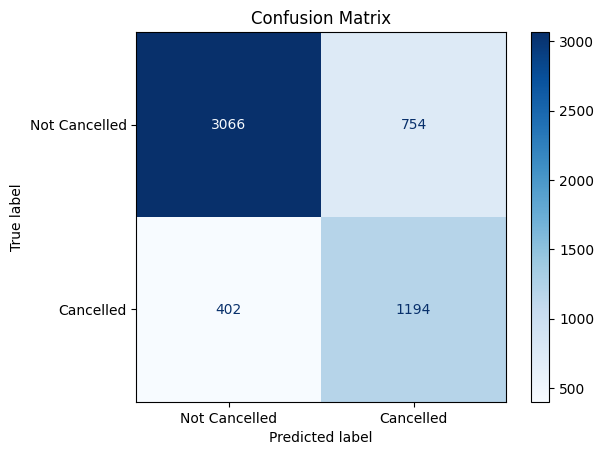

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Cancelled', 'Cancelled'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
rf_probs = rf_model.predict_proba(x_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, rf_probs))

ROC AUC: 0.8524545165269194


### XGBoost

In [ ]:
xgb_model = XGBClassifier(
    n_estimators = 200,
    learning_rate = 0.8,
    max_depth = 3,
    eval_metric='logloss',
    random_state=7
)

xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.8, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=7, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(x_test)

label_map = {0: 'Not Cancelled', 1: 'Cancelled'}
y_test_str = [label_map[label] for label in y_test]
y_pred_str = [label_map[label] for label in y_pred_xgb]
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test_str, y_pred_str))
print("Accuracy Score:")
print(f'{accuracy_score(y_test, y_pred_xgb) * 100:.2f}%')

Classification Report:
               precision    recall  f1-score   support

    Cancelled       0.79      0.72      0.75      1596
Not Cancelled       0.89      0.92      0.90      3820

     accuracy                           0.86      5416
    macro avg       0.84      0.82      0.83      5416
 weighted avg       0.86      0.86      0.86      5416

Accuracy Score:
86.13%


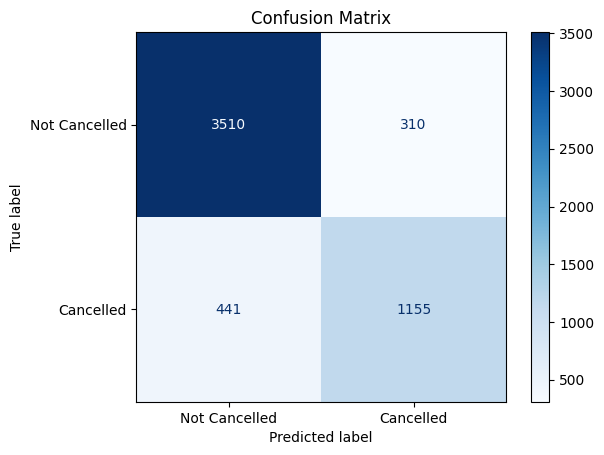

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Cancelled', 'Cancelled'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
xgb_probs = xgb_model.predict_proba(x_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, xgb_probs))

ROC AUC: 0.9220821195659306


## Evaluation

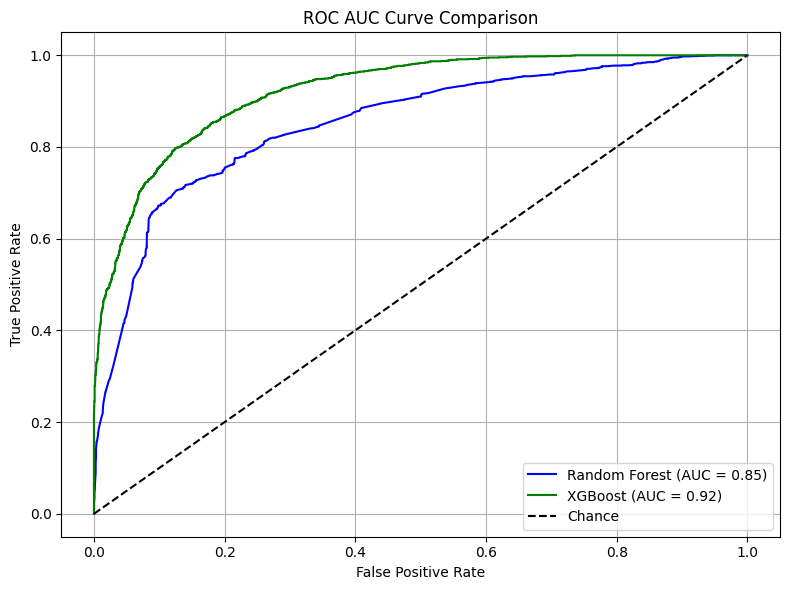

In [ ]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

rf_auc = auc(rf_fpr, rf_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='blue')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})', color='green')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')

plt.title('ROC AUC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

This ROC AUC curve compares the classification performance of a Random Forest and an XGBoost model on the same dataset. The green curve represents XGBoost with an AUC of **0.92**, while the blue curve represents Random Forest with an AUC of **0.85**. Since the AUC (Area Under Curve) measures a model's ability to distinguish between classes, XGBoost clearly outperforms Random Forest here. Its curve stays closer to the top-left corner, indicating higher true positive rates at lower false positive rates. The dashed diagonal line represents random guessing (AUC = 0.5), and both models perform well above that baseline. Overall, XGBoost shows stronger classification capability in this case.